**Aluno:** Douglas Leite Leal Moura

**Matrícula:** 2020715184

**Projeto Final - Machine Learning**

Avaliação de Clientes de um Banco

#### Instruções

Este trabalho utiliza a bibliteca scikit-learn da linguagem Python (versão 3.6).

O ambiente virtual pode ser configurado mediante a execução dos seguintes comandos no terminal:

$ virtualenv -p python3 .env

$ source .env/bin/activate

$ pip install -r requirements.txt

A sequência de comandos abaixo faz os imports necessários para a execução dos experimentos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

## 1. Introdução

A avaliação do risco de inadimplência tem um papel importante para os bancos e outros órgãos por estar associada a possíveis perdas e gerar grande impacto nas atividades do mercado financeiro. Fazer uma avaliação certeira permite que empréstimos sejam concedidos a mais pessoas e minimiza a perda da instituição que concede o crédito contribuindo para uma movimentação na economia.

Diante desse cenário, uma solução consiste em analisar uma base de dados de tomadores de crédito de um banco e avaliá-la com o propósito de utilização para a construção e estimação de um modelo analítico de previsão de inadimplência. No caso, um modelo preditivo que prevê se o tomador será um bom pagador baseado em características de clientes passados contidas nesta base de dados.

### 1.2 Objetivos

No presente trabalho, pretende-se avaliar um conjunto de soluções a fim de se obter um modelo preditivo capaz de determinar se um banco deve ou não conceder um emprestimo. 

cliente irá de inadimplência um conjunto de algoritmos de modo a avaliar diferentes modelos

Para tal, os seguintes algoritmos serão avaliadas:

1. Árvores de decisão.
2. Suport Vector Machine

### 1.3 Organização


## 2. Conjunto de dados

O conjunto de dados foi importado utilizando _Pandas_, uma poderosa biblioteca Python criada para a manipulação e análise de dados.

O arquivo `df_emprestimos_banco.csv` trata-se do conjunto de dados utilizado neste problema de predição de inadimplência. Ele contém dados de clientes que solicitaram empréstimos de um banco.

Estes dados foram disponibilizados durante um desafio da **EloGroup**, uma empresa que presta consultoria na área de Tecnologia, Analytics e Gestão para apoiar organizações públicas e privadas.  

Trata-se de um conjunto de dados grande (com 50.390 exemplos) e que possui diversas informações potencialmente úteis para o aprendizado do modelo (22 features).

In [2]:
# caminho dos arquivos
DATA_PATH = os.path.join("datasets", "projeto-final", "")

FILE = "df_emprestimos_banco.csv"

# funcao para importar o dataset utilizando a lib pandas
def load_data(file, path=DATA_PATH):
    file_path = os.path.join(path, file)
    return pd.read_csv(file_path, sep=",")

# importando dados
data = load_data(FILE)
data.shape # dimensao dos dados.

(50390, 23)

O método `head` apresenta as cinco primeiras linhas do dataset.

É possível identificar diversas informações interessantes para o preditor, como escolaridade, renda mensal informal, valor do emprestimo etc.

No geral, são informações do cliente e do empréstimo solicitado.

Evidentemente, o dataset possui alguns obstáculos que precisam ser tratados antes do treinamento, como dados ausentes e categóricos.

In [3]:
data.head()

,Escolaridade,Renda Mensal Informal,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,...,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Data,Estado
0,NaN,NaN,S,2,36,S,N,NaN,NaN,N,...,8174.32,263.25,5844.98,14282.55,1,1,1328587.0,1,2020-01-01,57
1,1.0,1894.5078,N,2,39,S,N,2.0,1.0,S,...,41775.63,1607.29,7652.26,51035.18,1,1,1424254.0,1,2020-01-01,59
2,1.0,NaN,S,2,26,S,N,NaN,1.0,S,...,522940.27,24860.40,319315.62,867116.29,1,1,1438519.0,0,2020-01-01,56
3,NaN,NaN,N,8,23,N,N,NaN,NaN,N,...,1593.00,21472.36,2967.48,26032.84,1,1,1426138.0,1,2020-01-01,56
4,NaN,NaN,S,2,33,S,N,NaN,NaN,N,...,2078.97,19.44,46.35,2144.76,1,1,1474504.0,0,2020-01-01,59


O atributo `PAGO` é a classe que queremos predizer. Trata-se de um problema de classificação binária, onde `0` indica que o emprestimo não foi pago e `1` indica que o empréstimo foi pago.

Outro problema presente neste conjunto de dados é o desbalanceamento no número de exemplos de cada classe.

É importante para o preditor, prever clientes inadimplentes, contudo, temos poucos exemplos desta classe.

A simples avaliação da acurácia pode não ser interessante para este problema, por isso outras métricas de avaliação também serão utilizadas, como precisão, revocação e F1-score.

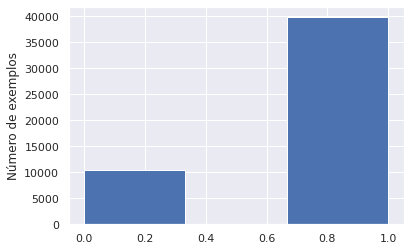

In [4]:
# plota um histograma da distribuição de y.
plt.hist(data['PAGO'], bins=3)
plt.ylabel('Número de exemplos')
plt.show()

A matrix de correlação abaixo mostra quais atributos estão mais relacionados entre si.

Ela revela diversos relacionamentos interessantes:

* A escolaridade possui uma correlação positiva com a renda mensal informal, com a quantidade de fonte de renda e com a idade.

* O id do usuário não possui qualquer relação se o empréstimo foi pago ou não.

* Há uma alta correlação entre o valor do empréstimo, multa, juros e o valor do empréstimo atualizado.

* A matrix de correlação sugere uma leve correlação negativa entre a classe e os atributos referentes a escolaridade e a renda.

Ou seja, uma escolaridade maior não sugere que o empréstimo será pago. Contudo, o adiantamento do dipósito poderia sugerir algo (pouco).

No momento, estes relacionamentos ainda não estão tão claros. Note que alguns atributos são categóricos, como estado civil. Outros atributos estão vázios ou com valores repetidos (valor conta correte, controle etc).

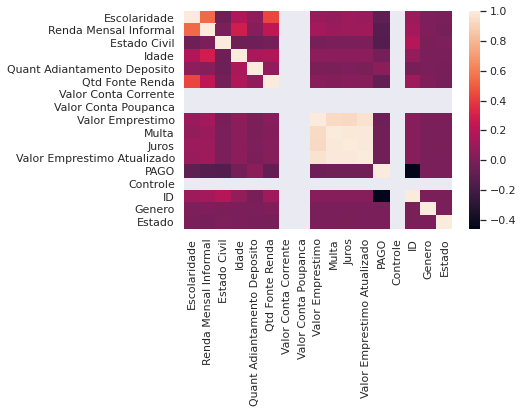

In [5]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix)
plt.show()

Esta análise preliminar revelou diversos insights sobre o conjunto de dados, como a necessidade de tratamento antes do treinamento.

Por isso, a seção seguinte do trabalho consiste em tratar os problemas identificados. 

### 2.1 Tratamento dos dados

O método `info` fornece uma visão geral dos atributos, como o tipo do atributo e a quantidade de dados ausentes.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50390 entries, 0 to 50389
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Escolaridade                 14615 non-null  float64
 1   Renda Mensal Informal        9768 non-null   float64
 2   Dependentes                  50390 non-null  object 
 3   Estado Civil                 50390 non-null  int64  
 4   Idade                        50390 non-null  int64  
 5   Conta Poupanca               50390 non-null  object 
 6   Conta Salario                50390 non-null  object 
 7   Quant Adiantamento Deposito  21843 non-null  float64
 8   Qtd Fonte Renda              12806 non-null  float64
 9   Cheque Sem Fundo             50390 non-null  object 
 10  Conta Conjunta               50390 non-null  object 
 11  Valor Conta Corrente         0 non-null      float64
 12  Valor Conta Poupanca         0 non-null      float64
 13  Valor Emprestimo

Foi constatado que as seguintes features possuem **todos os dados ausentes**:
* 11 **Valor Conta Corrente** (numérico)
* 12 **Valor Conta Poupanca** (numérico)

Para este caso, as duas colunas serão excluidas do dataset.

Outras colunas também serão excluídas:

* 12 **Controle** (numérico) - todos os dados são iguais
* 19 **ID** (numérico) - ID do cliente
* 21 **Data** (object) - todas os dados são iguais

Estes atributos possuem pouco potencial preditivo, por isso também serão excluídos.

In [7]:
# remove features
columns = ['Valor Conta Corrente', 'Valor Conta Poupanca', 'Controle', 'ID', 'Data']
data = data.drop(columns=columns)

Outras colunas, embora **incompletas**, ainda possuem dados:

* 0 **Escolaridade** (categórico) - falta cerca de 70.99%
* 1 **Renda Mensal Informal** (numérico) - falta cerca de 80.61%
* 7 **Quant Adiantamento Deposito** (numérico) - falta cerca de 56.65%
* 8 **Qtd Fonte Renda** (numérico) - Falta cerca de 74.58%

Para este caso, uma possibilidade é preencher os dados ausentes com base nos dados já existentes.
Assim, os dados ausentes foram preechindos com a média do atributo.

Embora a escolaridade tenha sido apotanda como um atributo númerico pelo método `info`, trata-se de um atributo categórico, em que:

1 - Nível Médio 2 - Ensino Superior 3 - Pós Graduação

Neste caso, não faz sentido calcular a média. Optou-se por preencher os dados com o valor mais típico para este atributo. Isto é, o valor 1, que remete ao `Nível Médio`.

In [8]:
# preencher com a media
median = data["Renda Mensal Informal"].mean()
data["Renda Mensal Informal"] = data["Renda Mensal Informal"].fillna(median)

median = data["Quant Adiantamento Deposito"].mean()
data["Quant Adiantamento Deposito"] = data["Quant Adiantamento Deposito"].fillna(median)

median = data["Qtd Fonte Renda"].mean()
data["Qtd Fonte Renda"] = data["Qtd Fonte Renda"].fillna(median)

# preencher com o mais frequente
encoder = LabelBinarizer()
most = data["Escolaridade"].value_counts().index[0]
data["Escolaridade"] = data["Escolaridade"].fillna(most)
one_hot = encoder.fit_transform(data['Escolaridade'])
data = pd.concat([data, pd.DataFrame(one_hot)], axis=1)
data = data.drop('Escolaridade', axis=1)

Além de escolaridade, outros atributos também são categóricos:
    
* **Estado Civil**: 2 - Solteiro, 8 - Casado(a) com comunhão de bens, 4 - Casado(a) com comunhão parcial de bens, 3 - Casado(a) com separação de bens, 1 - Divorciado,  11 - Separado Judicialmente, 7 - Viúvo(a),  9 - Outros

* **Conta Poupanca**: N- Não, S - Sim
* **Conta Salario**: N - Não, S - Sim
* **Cheque Sem Fundo**: N - Não, S - Sim
* **Conta Conjunta**: N - Não, S - Sim
* **Genero**: 0 - Masculino, 1 - Feminino
* **Estado**: 56 - São Paulo, 57 - Minas Gerais, 58 - Rio de Janeiro, 59 - Espirito Santo


In [9]:
# converter para numeros
encoder = LabelEncoder()
data['Dependentes'] = encoder.fit_transform(data['Dependentes'])
data['Conta Poupanca'] = encoder.fit_transform(data['Conta Poupanca'])
data['Conta Salario'] = encoder.fit_transform(data['Conta Salario'])
data['Cheque Sem Fundo'] = encoder.fit_transform(data['Cheque Sem Fundo'])
data['Conta Conjunta'] = encoder.fit_transform(data['Conta Conjunta'])

encoder = LabelBinarizer()
one_hot = encoder.fit_transform(data['Estado Civil'])
data = pd.concat([data, pd.DataFrame(one_hot)], axis=1)
data = data.drop('Estado Civil', axis=1)

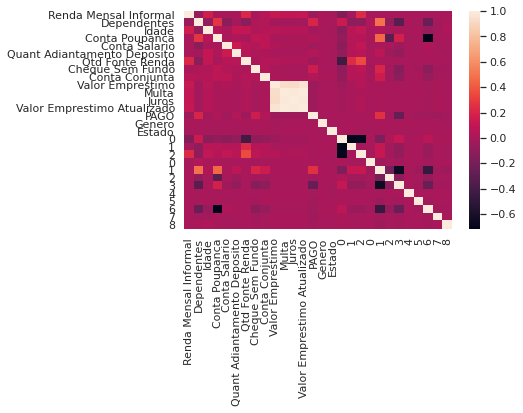

In [15]:
#data.info

corr_matrix = data.corr()
sns.heatmap(corr_matrix, xticklabels=True, yticklabels=True)
plt.show()

In [11]:
data.describe()

,Renda Mensal Informal,Dependentes,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,Conta Conjunta,Valor Emprestimo,...,2,0,1,2,3,4,5,6,7,8
count,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,5.039000e+04,...,50390.000000,50390.00000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000
mean,4635.610641,0.360032,31.724529,0.847986,0.023397,2.104931,1.241605,0.230026,0.041715,5.198927e+04,...,0.016571,0.00133,0.547053,0.030959,0.263604,0.000020,0.000814,0.154098,0.000655,0.001469
std,10908.128483,0.480014,8.565117,0.359038,0.151164,0.591530,0.250125,0.420853,0.199938,1.588819e+06,...,0.127658,0.03644,0.497786,0.173207,0.440591,0.004455,0.028513,0.361046,0.025583,0.038294
min,0.009600,0.000000,18.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.431000e+03,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4635.610641,0.000000,26.000000,1.000000,0.000000,2.000000,1.241605,0.000000,0.000000,1.593000e+03,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4635.610641,0.000000,30.000000,1.000000,0.000000,2.104931,1.241605,0.000000,0.000000,2.298035e+03,...,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4635.610641,1.000000,35.000000,1.000000,0.000000,2.104931,1.241605,0.000000,0.000000,7.172175e+03,...,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,516960.779100,1.000000,113.000000,1.000000,1.000000,18.000000,3.000000,1.000000,1.000000,2.867894e+08,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from scipy import stats

print("Teste", data['Valor Emprestimo'])
z = np.abs(stats.zscore(data))
print(np.where(z > 3))
data = data[(z < 3).all(axis=1)]
print(data.shape)

In [ ]:
X = data.drop("PAGO", axis=1) # remove atributo que sera predita.
y = data["PAGO"].copy()

In [ ]:
clf = RandomForestClassifier(n_estimators=60, max_depth=12, random_state=0)

score = cross_val_score(clf, X, y, cv=5, scoring="accuracy")



In [ ]:
score

## 3. Classificação

In [ ]:
# plota um histograma da distribuição de y.
plt.hist(y, bins=3)
plt.ylabel('Número de exemplos')
plt.show()